# <center> K - 近邻算法</center>

##### 通俗简单的来说 K近邻算法是采用测量不同特征值之间的距离方法进行数据分类，该算法的优缺点如下:
- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：计算复杂度高、空间复杂度高（要对样本之间进行距离比对计算，耗计算资源）
- 适用数据范围：数值型和标称型。

##### k-近邻算法的一般流程
1. 收集数据：可以使用任何方法。
2. 准备数据：距离计算所需要的数值，最好是结构化的数据格式。
3. 分析数据：可以使用任何方法。
4. 训练算法：此步骤不适用于k-近邻算法。
5. 测试算法：计算错误率。
6. 使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# 准备数据
def createDataSet():
    x_train = np.array([
        [1.,1.1],
        [1.,1.0],
        [0., 0.],
        [0.,0.1]
    ])  # 特征数据
    y_train = ["A","A","B","B"] # 标签数据
    return x_train, y_train

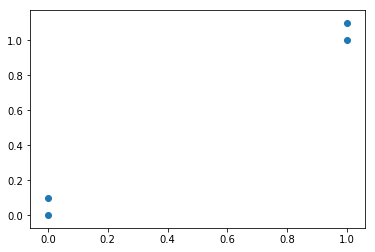

In [3]:
# 绘制数据
x_train, y_train = createDataSet()
plt.scatter(x_train[:,0],x_train[:,1])
plt.show()

##### 如何使用Knn 算法进行数据分类? 步骤如下
对未知类别属性的数据集中的每个点依次执行以下操作：
1. 计算已知类别数据集中的点与当前点之间的距离；
2. 按照距离递增次序排序；
3. 选取与当前点距离最小的 **k** 个点；
4. 确定前k个点所在类别的出现频率；
5. 返回前k个点出现频率最高的类别作为当前点的预测分类。

In [4]:
def classification(x,x_train,label,k):
    
    """
    x 要计算的样本
    x_train 训练模型的样本数据
    label 训练数据的标签数据
    k 选取的超参数，比较的样本数量，当然样本数量是小于训练样本数的
    """
    
    dataSize = x_train.shape[0]
    # 计算两坐标之间的距离
    diff_distance = np.tile(x,(dataSize,1)) - x_train # 横向复制数据 进行向量化计算
    diff_square = diff_distance**2 # 计算对应坐标的差值的平方 
    # 在横坐标轴计算和然后进行开根操作
    distanceSum = diff_square.sum(axis=1)
    distances = np.sqrt(distanceSum)  # 最终计算出的测试样本和每个训练样本时间的距离
    sortedDistances = distances.argsort() # 对距离进行排序 返回索引列表
    labelCountDict = {}
    for i in range(k):
        label = y_train[sortedDistances[i]]  # 根据排序后的索引列表进行标签统计
        labelCountDict[label] = labelCountDict.get(label,0) + 1
    sortedCountDict = sorted(labelCountDict.items(),key=lambda x:x[1],reverse=True)
    return labelCountDict # 返回统计结果

In [5]:
x_train,label = createDataSet()
classification(x=[0.0],x_train=x_train,label=label,k=3)

{'B': 2, 'A': 1}

### 使用 k-近邻算法改进约会网站的配对效果

In [6]:
def readFileAndCreateData(filepath):
    labels = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    reader = open(file=filepath)
    linesData = reader.readlines() # 解析每一行的数据
    # 开始存储数据 
    allDataLength  = len(linesData)
    X = np.zeros((allDataLength,4))
    for i in range(allDataLength):
        linesData[i].replace("\n","")
        linedata = linesData[i].split("\t")
        X[i:i+1,0:3] = linedata[0:3] 
        X[i:i+1,3:] = labels[linedata[-1].replace("\n","")]
    return X

In [7]:
Data = readFileAndCreateData("datingTestSet.txt")
labels = Data[:,Data.shape[1]-1].reshape(1,-1)[0]

In [8]:
# 选取特征进行绘制 
def plotData(Data,labelsindex):
    labels = Data[:,Data.shape[1]-1].reshape(1,-1)[0]
    plt.scatter(Data[:,labelsindex[0]],Data[:,labelsindex[-1]],labels*10,labels*10)
    plt.show()

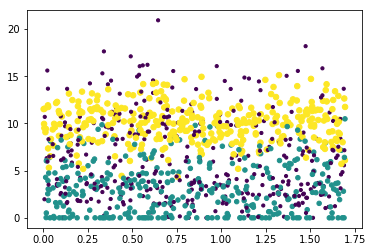

In [9]:
plotData(Data,[2,1])

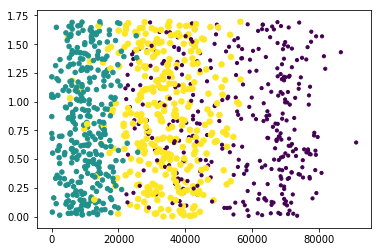

In [10]:
plotData(Data,[0,2])

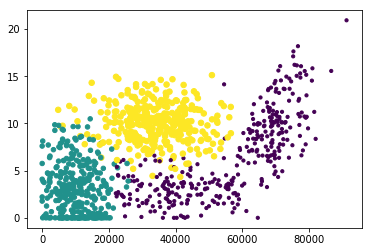

In [11]:
plotData(Data,[0,1])

In [12]:
# 对数据进行归一化处理
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
stand.fit(Data[:,0:3])
normalizeData = stand.transform(Data[:,0:3])
normalizeData = np.hstack((normalizeData,Data[:,-1:]))

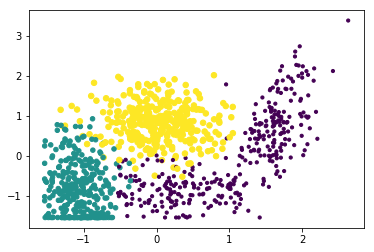

In [13]:
plotData(normalizeData,[0,1])

In [14]:
def classification_knn(x_test,x_train,y_train,k):
    
    """
    封装Knn算法
    x_test  测试的数据
    x_train 训练的数据
    y_train 训练的标签
    k       选取的样本数
    """
    
    dataSize = x_train.shape[0]
    # 计算两坐标之间的距离
    diff_distance = np.tile(x_test,(dataSize,1)) - x_train # 横向复制数据 进行向量化计算
    diff_square = diff_distance**2 # 计算对应坐标的差值的平方 
    # 在横坐标轴计算和然后进行开根操作
    distanceSum = diff_square.sum(axis=1)
    distances = np.sqrt(distanceSum)  # 最终计算出的测试样本和每个训练样本时间的距离
    sortedDistances = distances.argsort() # 对距离进行排序 返回索引列表
    labelCountDict = {}
    for i in range(k):
        label = str(labels[sortedDistances[i]])  # 根据排序后的索引列表进行标签统计
        labelCountDict[label] = labelCountDict.get(label,0) + 1
    sortedCountDict = sorted(labelCountDict.items(),key=lambda x:x[1],reverse=True)
    return labelCountDict # 返回统计结果

In [16]:
x_test = stand.transform(np.array([40920,8.326976,0.953952]).reshape(-1,3))
classification_knn(x_test,normalizeData[:,0:3],labels,100)
# 选取一个真实有效的数据进行预测，可以看出预测结果为 3，对应为lage

{'3.0': 95, '1.0': 5}

k-近邻算法是分类数据最简单最有效的算法，k-近邻算法是基于实例的学习，使用算法时我们必须有接近实际数据的训练样本数
据。k-近邻算法必须保存全部数据集，如果训练数据集的很大，必须使用大量的存储空间。此外，
由于必须对数据集中的每个数据计算距离值，实际使用时可能非常耗时。
k-近邻算法的另一个缺陷是它无法给出任何数据的基础结构信息，因此我们也无法知晓平均
实例样本和典型实例样本具有什么特征`
